In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df_men = pd.read_excel(
    "OlympicRankings.xlsx", sheet_name="March men's Olympic standings"
)

df_men.fillna(0, inplace=True)
df_men.drop(df_men.index[-2:], inplace=True)

tournaments_left = [
    "Elite16 Doha, Qatar",
    "Challenge Recife, Brazil",
    "Challenge Saquarema, Brazil",
    "Challenge Guadalajara, Mexico",
    "Elite16 Tepic, Mexico",
    "Challenge Xiamen, China",
    "Elite16 Natal, Brazil",
    "Elite16 Espinho, Portugal",
    "Challenge Stare Jablonki, Poland",
    "Elite16 Ostrava, Czech Republic",
]


df_men[tournaments_left] = pd.DataFrame(
    [[float("nan")] * len(tournaments_left)], index=df_men.index
)

df_men = df_men[~df_men["Team"].str.contains("Ondrej Perusic")]
df_men.reset_index(inplace=True, drop=True)

df_men["Points Need to be at"] = 0

In [30]:
df_men

,Team,Country,Total,Final Evet 2024,NORCECA Champs,Nuvali Challenge,Joao Pessoa Elite16,Chiang Mai Challenge,Haikou Challenege,Goa Challenge,...,"Challenge Recife, Brazil","Challenge Saquarema, Brazil","Challenge Guadalajara, Mexico","Elite16 Tepic, Mexico","Challenge Xiamen, China","Elite16 Natal, Brazil","Elite16 Espinho, Portugal","Challenge Stare Jablonki, Poland","Elite16 Ostrava, Czech Republic",Points Need to be at
0,"Anders Mol, Christian Sorum",Norway,9460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,"David Ahman, Jonatan Hellvig",Sweeden,8920,0.0,0.0,0.0,1200.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"Sam Cottafava, Paolo Nicolai",Italy,8440,0.0,0.0,0.0,1100.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,"Andre Loyola, George Wanderley",Brazil,8380,0.0,0.0,0.0,900.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,"Nils Ehlers, Clemens Wickler",Germany,8200,0.0,0.0,0.0,460.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,"Julian Azaad, Maciel Bueno",Argentina,440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
60,"Momme Lorenz, Jonas Reinhardt",Germany,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
61,"Felipe Alves, Gabriel Dos Reis",Brazil,300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
62,"Simon Kulzer, Bennet Poniewaz",Germany,220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [83]:
point_elite = [
    1200,
    1100,
    1000,
    900,
    760,
    760,
    760,
    760,
    600,
    600,
    600,
    600,
    460,
    460,
    460,
    460,
    400,
    400,
    400,
    340,
    340,
    340,
    340,
    340,
    340,
    340,
    340,
]


point_chal = [
    800,
    760,
    720,
    680,
    600,
    600,
    600,
    600,
    460,
    460,
    460,
    460,
    460,
    460,
    460,
    460,
    360,
    360,
    300,
    300,
    300,
    300,
    300,
    300,
    220,
    220,
    220,
    220,
    220,
    220,
    220,
    140,
    140,
    140,
    140,
    140,
    140,
]

num_chal_left = 5
num_elite_left = 5

: 

In [81]:
df_top25 = df_men.head(25)
top_score = df_top25.iloc[0]["Total"]

for i in range(17):
    print(point_chal[i])
    print(point_elite[i])
    df_top25.loc[17-i, 'Points Need to be at'] = top_score - ((num_chal_left * point_chal[i]) + (num_elite_left * point_elite[i]))

df_top25.loc[0, "Points Need to be at"] = top_score

800
1200
760
1100
720
1000
680
900
600
760
600
760
600
760
600
760
460
600
460
600
460
600
460
600
460
460
460
460
460
460
460
460
360
400


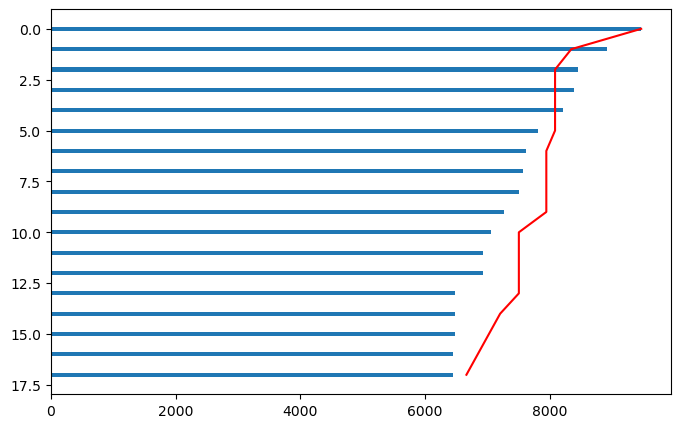

In [82]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(df_top25.head(18)["Points Need to be at"], df_top25.head(18)["Points Need to be at"].index, color = "red")
ax.barh(df_top25.head(18)["Total"].index, df_top25.head(18)["Total"], height=0.2)
ax.invert_yaxis()
plt.show()